In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
from ste import STE

# Toy models

## Example 1

In [4]:
# Create the first time-series.
x = np.arange(0, 20, 0.01)
serie = np.sin(x)
serie = pd.Series(serie)

In [5]:
# Create the shifted time-series.
shift = 6
serie_shift = serie.shift(shift).dropna()

In [6]:
# Now, I have the two time-series where I see how x causes y.
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True)

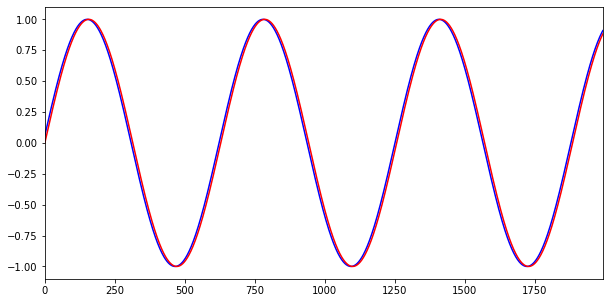

In [7]:
f = plt.figure(figsize = (10, 5))
x.plot(ax = f.gca(), c = "b"); 
y.plot(ax = f.gca(), c = "r");

In [8]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x, y, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

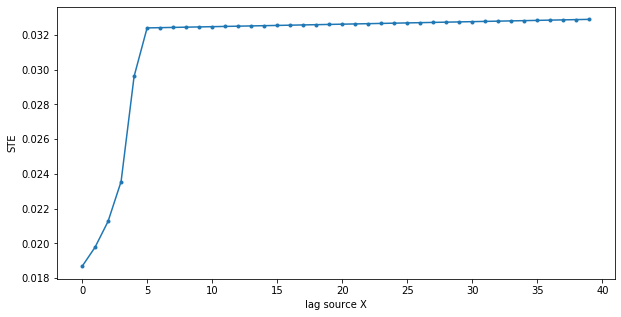

In [9]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");

## Example 2

In [10]:
# Now, I have the two time-series where I see how x causes y.
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True) + 4

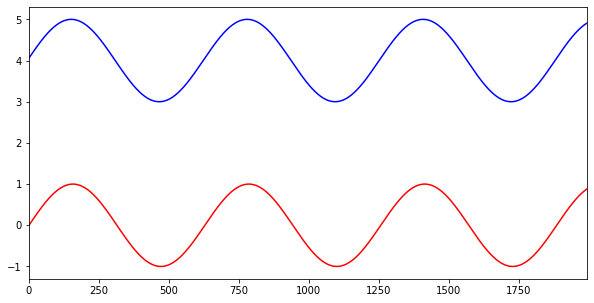

In [11]:
f = plt.figure(figsize = (10, 5))
x.plot(ax = f.gca(), c = "b"); 
y.plot(ax = f.gca(), c = "r");

In [12]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x, y, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

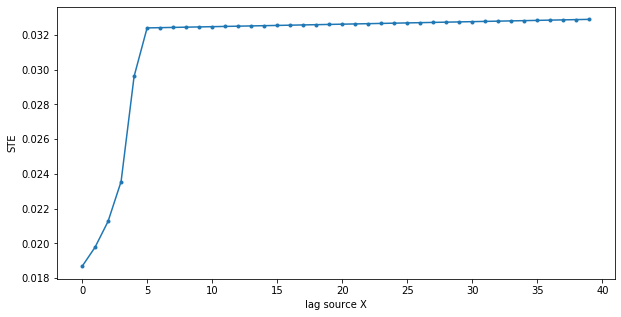

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");

## Example 3

In [14]:
# Now, I have the two time-series where I see how x causes y.
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True).values

for i in range(len(x)):
    if i > 0:
        x[i] = -x[i]
    if i < 0:
        x[i] = x[i]
        
x = pd.Series(x)

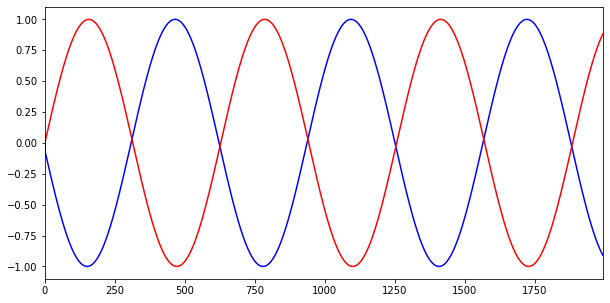

In [15]:
f = plt.figure(figsize = (10, 5))
x.plot(ax = f.gca(), c = "b"); 
y.plot(ax = f.gca(), c = "r");

In [16]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x, y, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

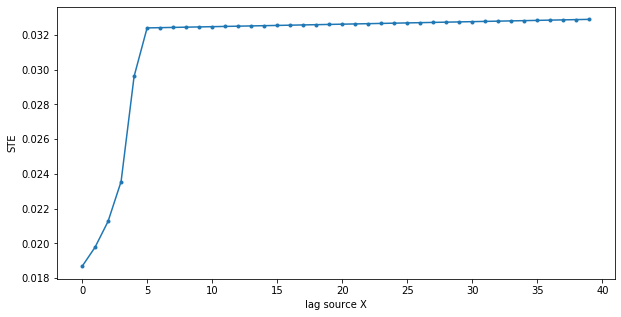

In [17]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");

## Example 4

In [18]:
y = serie_shift.reset_index(drop = True)
x = serie[shift:].reset_index(drop = True)

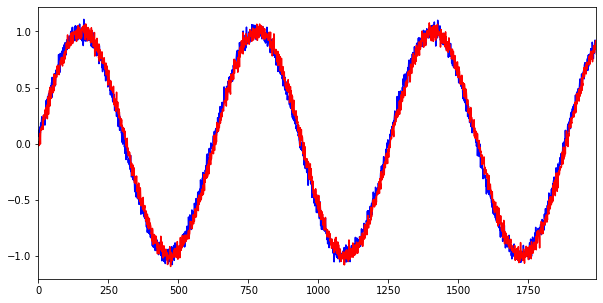

In [19]:
# If I add noise the algorithm not work well.
from tsaug import AddNoise

# AddNoise.
my_augmenter = (AddNoise(scale = 0.02) @ 1)
x_noise = pd.Series(my_augmenter.augment(x.values))
y_noise = pd.Series(my_augmenter.augment(y.values))

f = plt.figure(figsize = (10, 5))
x_noise.plot(ax = f.gca(), c = "b");
y_noise.plot(ax = f.gca(), c = "r");

In [20]:
# Find the optimal lag for the predictor X to predict Y.
lags = 40
TEs = list()
for k in range(lags):
    result = STE.calc_ste(x_noise, y_noise, m = 3, kx = k+1, ky = 1)
    TEs.append(result)

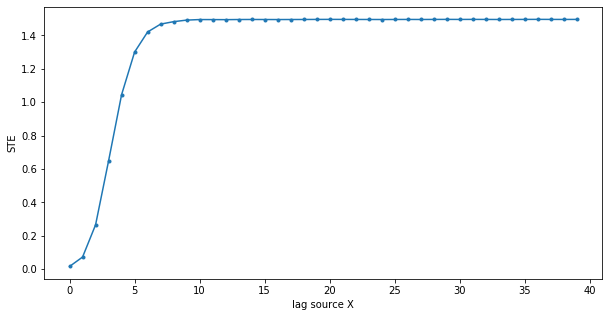

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(TEs, ".-")
plt.xlabel("lag source X");
plt.ylabel("STE");